In [8]:
import sys
try:
    from Optimizer import minimize
except:
    from Implementation.Optimizer import minimize

try:
    sys.path.append('../AutoDiff')
    from variables import Variable
except:
    from AutoDiff.variables import Variable

    
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [47]:
def plot_path_2D(val_arr, x_grid, y_grid, fn):
    f_grid = fn(x_grid.reshape(1, -1),
                y_grid.reshape(-1, 1))
    plt.contourf(x_grid, y_grid, f_grid, cmap='Blues',
                 norm=colors.LogNorm(vmin=f_grid.min(), vmax=f_grid.max())
                 )
    plt.colorbar(orientation='horizontal')

    v0 = val_arr[0]
    vends = val_arr[-1]
    plt.plot(val_arr[:, 0], val_arr[:, 1], label='path', color='black',
             linewidth=3.0)

    # n = int(len(val_arr)/2)
    
    # try:
    #     x, y = val_arr[n]
    #     dx,dy=val_arr[n+1]-val_arr[n]
    # except:
    #     x, y = val_arr[n-1]
    #     dx,dy=val_arr[n]-val_arr[n-1]
    # plt.arrow(x,y, dx, dy, shape='full',
    #           lw=0, length_includes_head=True, head_width=0.05, color='black')

    plt.scatter(v0[0], v0[1], s=100, color='red', label='start')
    plt.scatter(vends[0], vends[1], s=100, color='black', label='minimum [{0:.2f},{1:.2f}]'.format(vends[0],vends[1]))

    plt.legend(fontsize=14)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Start = [{0}, {1}]'.format(v0[0], v0[1]), fontsize=16)

    plt.xlim([x_grid.min(), x_grid.max()])
    plt.ylim([y_grid.min(), y_grid.max()])

def plot_path_1D(val_arr,x_grid,fn):
    f_grid = fn(x_grid)
    plt.plot(x_grid,f_grid,label='F function',color='black',linewidth=3.0)
    v0 = val_arr[0]
    vends = val_arr[-1]
    plt.scatter(v0, fn(v0), s=100, color='red', label='start')
    plt.scatter(vends, fn(vends), s=100, color='black', label='minimum {0:.2f}'.format(vends[0]))

    plt.plot(val_arr, fn(val_arr), 'r--',label='path', 
             linewidth=3.0)
    # n=int(len(val_arr)/2)
    
    # plt.arrow(val_arr[n], fn(*val_arr[n]), 0.1, fn(*(val_arr[n]+0.1))-fn(*val_arr[n]), shape='full',
    #                    lw=0, length_includes_head=True, head_width=0.05,color='red')


    plt.title('Start = {0}'.format(v0), fontsize=16)

    plt.xlim([x_grid.min(), x_grid.max()])
    plt.ylim([f_grid.min(), f_grid.max()])
    plt.legend(fontsize=14)

    plt.xlabel('x')
    plt.ylabel('f(x)')

In [42]:
def plot_path(fn,val_lists,title,dim=2,**kwargs):
    n=len(val_lists)
    if n>=3:
        plt.figure(figsize=(7*3,8*np.ceil(n/3)))
    else:
        plt.figure(figsize=(7*n,8))
    for i in range(n):
        plt.subplot(np.ceil(n/3),min(3,n),i+1)
        if dim==1:
            # plot 1d path
            plot_path_1D(val_arr=val_lists[i].val_rec,fn=fn,**kwargs)
        else:
            # plot 2D path
            plot_path_2D(val_arr=val_lists[i].val_rec,fn=fn,**kwargs)
    plt.suptitle(title, fontsize = 25, y=1.02)

In [43]:

def f1(x, y): return 100*(y-x**2)**2 + (1-x)**2
v0_list = [[-1,1], [0,1], [2,1]]
val_lists=[ minimize(f1, vo, method="Steepest Descend") for vo in v0_list]
x_grid = np.linspace(-3, 3, 150)
y_grid = np.linspace(-3, 4, 200)

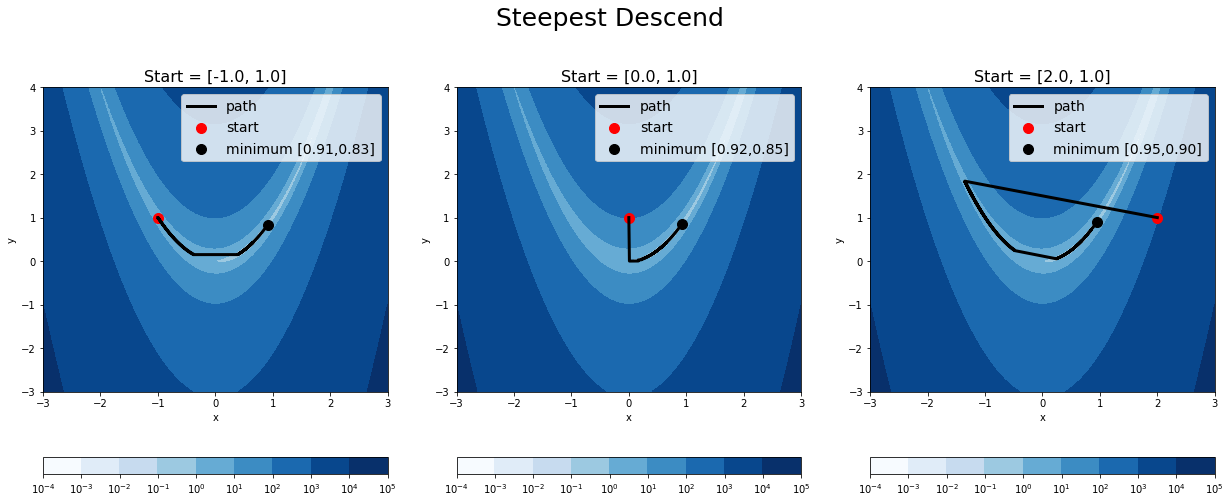

In [44]:
plot_path(f1,val_lists,"Steepest Descend",x_grid=x_grid,y_grid=y_grid)

In [45]:
f0=lambda x: x**2+(x-3)**2
v0_list = [[-1], [0], [2]]
val_lists=[ minimize(f0, vo, method="Steepest Descend") for vo in v0_list]

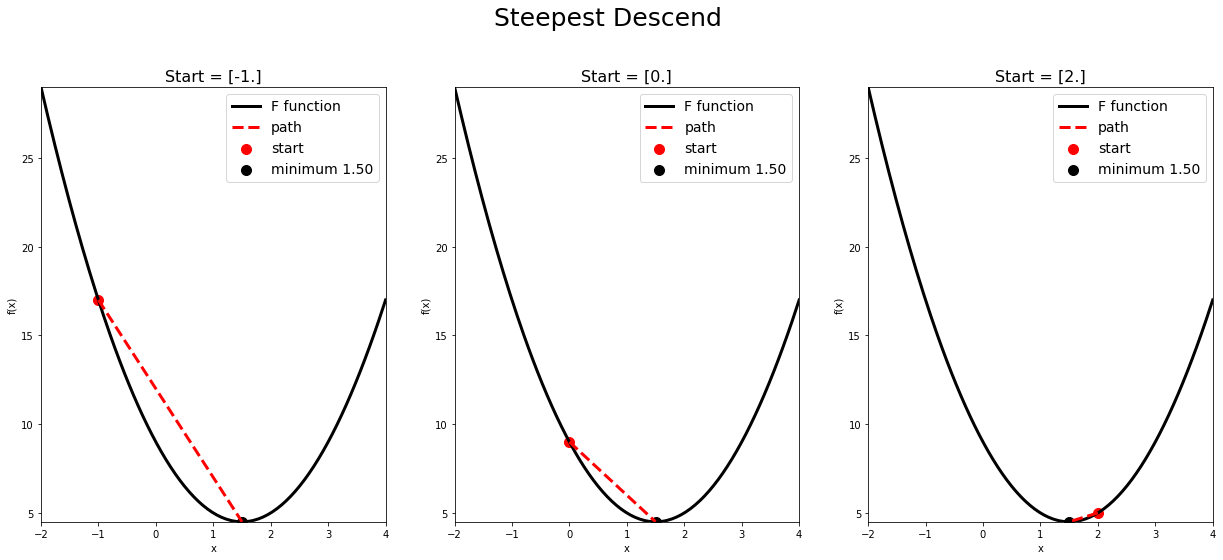

In [49]:
x_grid = np.linspace(-2, 4, 150)

plot_path(f0,val_lists,"Steepest Descend",dim=1,x_grid=x_grid)
